# Agreement Rates between two classifiers

In [1]:
import torch
import matplotlib.pyplot as plt

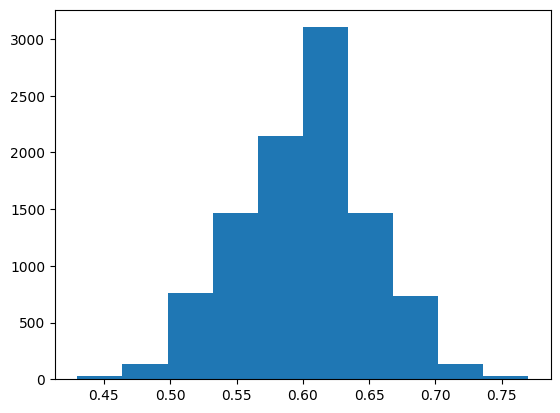

In [2]:
def biased_coin(bias:float = 0.5, size:int=1) -> torch.Tensor:
    rnd = torch.rand(size=(size,))
    return (rnd <= bias).float()

n_ones = [sum(biased_coin(0.6, size=100))/100 for _ in range(10000)]
plt.hist(n_ones)
plt.show()

Say, we have a population with the following prevalence of positive class labels:

In [3]:
prevalence = 0.8
y_true = biased_coin(prevalence, size=100)

Assume we trained two classifers to make predictions:
N = 100

Classifier 1: 
| - | Y1' = 1 | Y1' = 0|
| :- | :-: | :-: |
Y = 1 | 60 | 20 | 
Y = 0 | 10 | 10 | 

acc = 0.7



Classifier 2:
| - | Y2' = 1 | Y2' = 0|
| :- | :-: | :-: |
Y = 1 | 40 | 40 | 
Y = 0 | 0 | 20 | 

acc = 0.6


Classifer 1 vs. Classifier 2: 
| - | Y2' = 1 | Y2' = 0| |
| :- | :-: | :-: | -: |
Y1' = 1 | 25 | 45 | 70 |
Y'1 = 0 | 15 | 15 | 30 |
| | 40 | 60 | N=100 |


agreement rate = (25+15)/N = 0.4


In [4]:
num_samples = 100

# classifier 1
acc1 = 0.7
likelihood1 = 0.70 # likelihood of the classifier to predict 1 as observed on the test data, P(Y1' = 1)
y_hat1 = biased_coin(likelihood1, size=100)

# classifier 2
acc2 = 0.6
likelihood2 = 0.40 # P(Y2' = 1)
y_hat2 = biased_coin(likelihood2, size=100)

In [5]:
(likelihood1 * likelihood2) + ((1-likelihood1)* (1-likelihood2))

0.45999999999999996

In [6]:
(acc1 * acc2) + ((1-acc1)* (1-acc2))

0.54

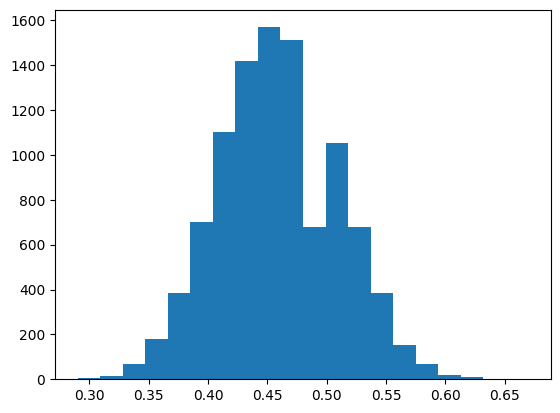

mean = 0.4598


In [7]:
num_rounds = 10_000 
agreement = [sum(biased_coin(likelihood1, size=100) == biased_coin(likelihood2, size=100))/num_samples for _ in range(num_rounds)]
plt.hist(agreement, bins=20)
plt.show()
print(f"mean = {sum(agreement)/num_rounds:.4f}")

In [8]:
l1 = torch.arange(0,1.01, step=0.02)
l2 = torch.arange(0,1.01, step=0.02)

In [9]:
x, y = torch.meshgrid([l1,l2], indexing='ij')

In [10]:
def agreement(l1, l2):
    return l1 * l2 + (1-l1)*(1-l2)

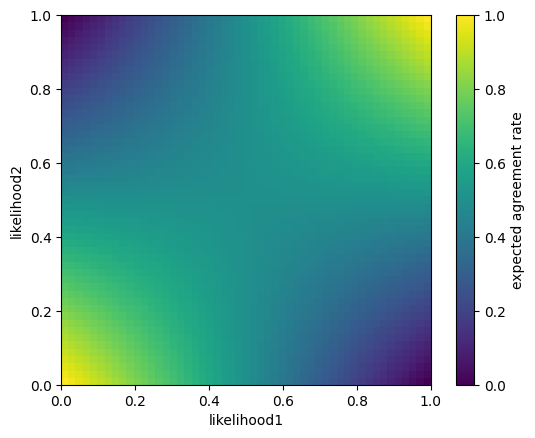

In [11]:
fig, ax = plt.subplots(1,1)
res = agreement(x,y)
pos = ax.imshow(res.numpy(), cmap='viridis', vmax=res.max(), vmin=res.min(), origin='lower', extent=[0,1,0,1],)
ax.set_xlabel('likelihood1')
ax.set_ylabel('likelihood2')
cb = fig.colorbar(pos, ax=ax)
cb.set_label("expected agreement rate")
plt.show()

In [12]:
# ax = plt.axes(projection='3d')
# ax.plot_surface(x.numpy(), y.numpy(), agreement(x,y).numpy())
# plt.show()